# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [68]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shanelkuchera/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [70]:
type(api_key)

str

In [71]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [72]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy",
    
)

# Show sample article
Bitcoin_headlines["articles"][0]

{'source': {'id': None, 'name': 'New York Times'},
 'author': 'Katie Benner',
 'title': 'Justice Dept. Announces Raft of Changes Meant to Deter Cyberthreats',
 'description': 'The moves came a week after the department made its largest financial seizure ever, confiscating over $3.6 billion worth of Bitcoin stolen in a 2016 hacking.',
 'url': 'https://www.nytimes.com/2022/02/17/us/politics/justice-department-cybersecurity.html',
 'urlToImage': 'https://static01.nyt.com/images/2022/02/17/us/politics/17dc-justice/merlin_199612353_b05bfb07-3da8-404e-8a75-221181e5d014-facebookJumbo.jpg',
 'publishedAt': '2022-02-17T23:51:49Z',
 'content': 'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]'}

In [73]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show the total number of news
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 3522


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [74]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,text,compound,positive,negative,neutral
0,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
3,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [75]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,text,compound,positive,negative,neutral
0,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964
3,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
4,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917


In [76]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.006470,0.056150,0.050100,0.893650
std,0.431356,0.047553,0.062982,0.070133
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.267050,0.000000,0.000000,0.851750
50%,0.000000,0.060000,0.019000,0.902500
75%,0.345300,0.078250,0.085000,0.948250
max,0.735100,0.152000,0.187000,1.000000


In [77]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133310,0.072500,0.032200,0.895250
std,0.409553,0.085186,0.040875,0.093491
min,-0.526700,0.000000,0.000000,0.692000
25%,-0.110175,0.000000,0.000000,0.841000
50%,0.000000,0.051500,0.000000,0.904500
75%,0.528675,0.130250,0.059000,0.973000
max,0.834000,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth had the highest mean positive score 

Q: Which coin had the highest compound score?

A: Eth had the highest compound score

Q. Which coin had the highest positive score?

A: Eth had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [78]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [79]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words("english")

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)


In [82]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens


In [60]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    words = [regex.sub('', word) for word in words]
    
    # Remove the stop words    
    sw = set(stopwords.words('english'))

    # Lemmatize Words into root words
    
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in words if word not in sw]
    
    return tokens



In [84]:
# Create a new tokens column for Bitcoin
btc_df["Tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,text,compound,positive,negative,neutral,Tokens
0,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[Even, cyberspace, Department, Justice, able, ..."
1,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[Bitcoin, seen, many, libertarian-leaning, fan..."
2,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[Feb, 22, Reuters, Bitcoin, miner, feeling, he..."
3,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[March, 1, Reuters, Bitcoin, leapt, since, Rus..."
4,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854,"[Whose, side, cryptocurrency, asked, Satoshi, ..."


In [85]:
# Create a new tokens column for Ethereum
eth_df["Tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,compound,positive,negative,neutral,Tokens
0,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[February, shit, hit, fan, usual, way, old, tw..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
2,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[People, Colorado, able, pay, state, tax, cryp..."
3,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[Coinbase, reported, share, trading, volume, e..."
4,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[Illustration, James, Bareham, Verge, 15, mill..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [86]:
from collections import Counter
from nltk import ngrams

In [87]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('Reuters', 'Bitcoin'), 3),
 (('since', 'Russia'), 3),
 (('char', 'Bitcoin'), 2),
 (('char', 'Feb'), 2),
 (('char', 'March'), 2),
 (('March', '15'), 2),
 (('/li', 'li'), 2),
 (('char', 'SAN'), 2),
 (('SAN', 'SALVADOR'), 2),
 (('Reuters', 'El'), 2)]

In [88]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('char', 'cryptocurrency'), 3),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3),
 (('record', 'height'), 3)]

In [89]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [90]:
# Use token_count to get the top 10 words for Bitcoin

all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, 10)


[('char', 20),
 ('Bitcoin', 8),
 ('Reuters', 7),
 ('Russia', 6),
 ('cryptocurrency', 5),
 ('March', 5),
 ('market', 5),
 ('Ukraine', 4),
 ('bitcoin', 4),
 ('15', 4)]

In [91]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 5),
 ('cryptocurrency', 5),
 ('year', 5),
 ('volume', 5),
 ('past', 5),
 ('hit', 4),
 ('crypto', 4),
 ('NFTs', 4),
 ('market', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

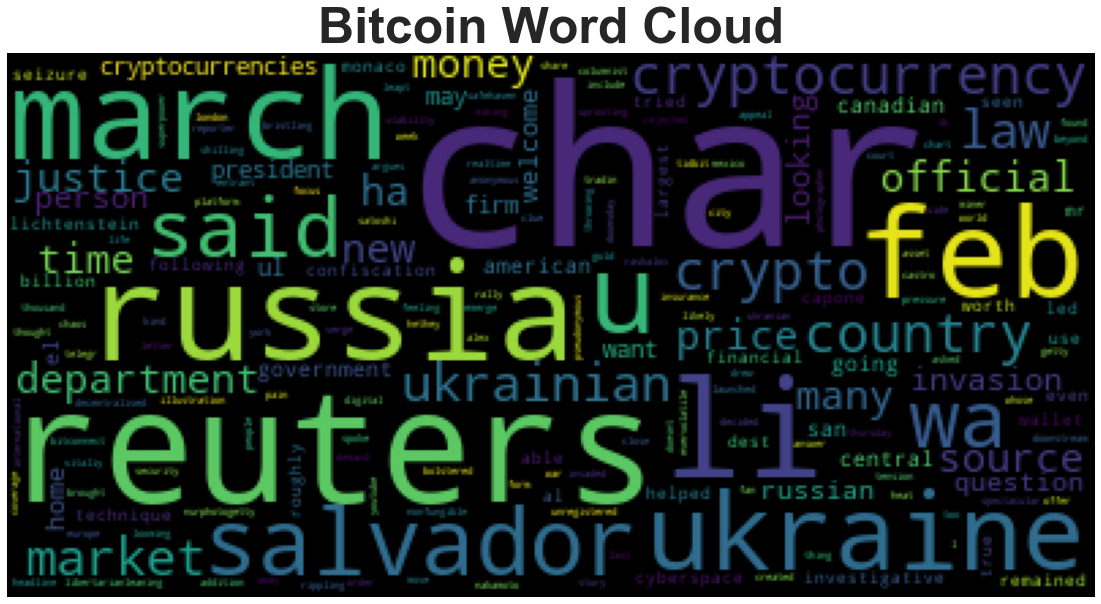

In [29]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

#def wordcloud(text, title="Bitcoin"):
   # df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
   # plt.imshow(df_cloud)
    #plt.axis("off")
    #fontdict = {"fontsize": 48, "fontweight" : "bold"}
   # plt.title(title, fontdict=fontdict)
   # plt.show()
# wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")


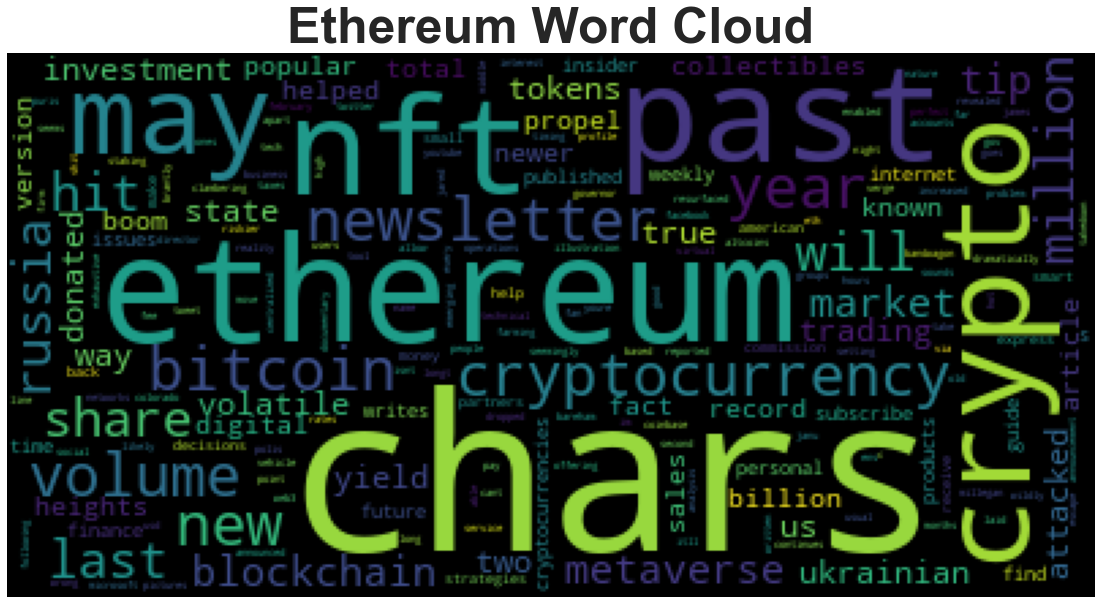

In [30]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [92]:
import spacy
from spacy import displacy

In [93]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
# YOUR CODE HERE!

In [94]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [95]:
# Concatenate all of the Bitcoin text together
btc_corpus

'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]The confiscation of the Bitcoin that remained in Mr. Lichtensteins wallet on Feb. 1, worth roughly $3.6 billion at the time, was the Justice Departments largest financial seizure ever, officials have… [+1442 chars]"Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as … [+3914 chars]Feb 22 (Reuters) - Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\nThe cryptocurrency\'s spectacular rally in 2021 drew thousands of entrants into mining,… [+4196 chars]March 1 (Reuters) - Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and mo

In [96]:
# Run the NER processor on all of the text
# Add a title to the document
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"


In [97]:
# Render the visualization
displacy.render(btc_ner, style='ent')



In [99]:
# List all Entities


for ent in btc_ner.ents:
    print(ent.text, ent.label_)


the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
the New York Times ORG
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
15 CARDINAL
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
Reuters ORG
BITCOIN PERSON
15 CARDINAL
Reuters ORG
U.S. GPE
Joe Biden PERSON
Summary</li><li> WORK_OF_ART
Law firms</li><li>
 PERSON
documents</li></ul GPE
Ukrainian NORP
Tom Lee PERSON
Ukraine GPE
Shark Tank WORK_OF_ART
Kevin O'Leary's PERSON
100,000 MONEY
200,000 MONEY
300,000 MONEY
two-week DATE
Tuesday DATE
Russians NORP
Ukrainians NORP
Feb 20 DATE
Reuters ORG
El Salvador GPE
Nayib

---

### Ethereum NER

In [38]:
# Concatenate all of the Ethereum text together
eth_corpus


'in february, shit hit the fan in the usual way: an old tweet resurfaced. brantly millegan, director of operations at ethereum name service (ens), a web3 business, had written the following in may 201… [+3096 chars]technical analysis isnt a perfect tool, but it may point the way for ethereum\r\nethereum\xa0(eth-usd\r\n) continues to be a volatile crypto investment. crypto is volatile by nature im not setting it apart … [+3612 chars]people in colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the us state\'s governor has revealed.\r\ngov. jared polis laid out the timing of the move, a longt… [+2206 chars]coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nbetween 2020 and 2021, ethereum trading volume in… [+1187 chars]illustration by james bareham / the verge\r\n\n \n\n\n more than $15 million has been donated so far more than $15 million in c

In [39]:
# Run the NER processor on all of the text
# Add a title to the document
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"


In [40]:
# Render the visualization
displacy.render(eth_ner, style='ent')


In [100]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)




february DATE
may 201 DATE
colorado GPE
the middle of this year DATE
us GPE
last year DATE
between 2020 and 2021 DATE
james bareham PERSON
more than $15 million MONEY
more than $15 million MONEY
russia GPE
2022 DATE
second ORDINAL
two months DATE
two hours TIME
waka flacka fla ORG
the past few years DATE
$23 billion MONEY
weekly DATE
weekly DATE
wednesday DATE
first ORDINAL
brett harrison PERSON
the past few years DATE
$23 billion MONEY
american express ORG
russia GPE
american express ORG
more than $4 million MONEY
russia GPE


---